In [1]:
import pandas as pd
import numpy as np
import timeit
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
#import plotly.graph_objs as go
%matplotlib inline

In [2]:
from pandas_datareader import data as pdr

/Users/reejungkim/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [3]:
days_to_extract = 1000
days_to_forecast = 20

In [4]:
date_end = dt.date.today()
date_start = date_end - dt.timedelta(days_to_extract)

In [5]:
date_end, date_start

(datetime.date(2020, 7, 1), datetime.date(2017, 10, 5))

In [93]:
df = pdr.DataReader("VUSA.L", 'yahoo', date_start, date_end).reset_index()

df = df.loc[df['Date'].notnull()]

In [94]:
df

,Date,High,Low,Open,Close,Volume,Adj Close
0,2017-10-05,36.840000,36.279999,36.439999,36.840000,1543205.0,35.635609
1,2017-10-06,37.169998,37.009998,37.099998,37.070000,287495.0,35.858089
2,2017-10-09,36.970001,36.759998,36.950001,36.880001,223352.0,35.674297
3,2017-10-10,36.810001,36.630001,36.730000,36.619999,81585.0,35.422798
4,2017-10-11,36.790001,36.639999,36.720001,36.700001,132649.0,35.500191
...,...,...,...,...,...,...,...
678,2020-06-23,47.972500,47.459999,47.562500,47.652500,207895.0,47.652500
679,2020-06-24,47.537498,46.580002,47.457500,46.622501,764968.0,46.622501
680,2020-06-25,46.742500,46.042500,46.430000,46.445000,294754.0,46.445000
681,2020-06-26,47.230000,46.442501,47.000000,46.686199,365825.0,46.686199


In [95]:
df.dtypes

Date         datetime64[ns]
High                float64
Low                 float64
Open                float64
Close               float64
Volume              float64
Adj Close           float64
dtype: object

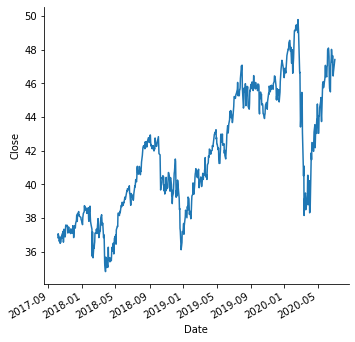

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.relplot(x='Date', y='Close', kind='line', data=df).fig.autofmt_xdate()

# preprocessing

In [97]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

#scaler = MinMaxScaler()
scaler = MinMaxScaler(feature_range=(0, 1))
le = preprocessing.LabelEncoder()

In [98]:
df['Date encoded'] = le.fit_transform(df['Date'])

In [99]:
days_cutoff = len(df) - days_to_forecast

In [100]:
scaled_Close = scaler.fit_transform(df[['Close']])

In [101]:
scaled_Close = np.squeeze(scaled_Close)

In [102]:
df.values[days_cutoff:, 7]

array([663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675,
       676, 677, 678, 679, 680, 681, 682], dtype=object)

In [103]:
x_train, y_train = df.values[:days_cutoff, 7], scaled_Close[:days_cutoff]
x_test, y_test = df.values[days_cutoff:, 7], scaled_Close[days_cutoff:]

x_train, y_train = df.values[:600, 0], scaled_Close[:600]
x_test, y_test = df.values[600:, 0], scaled_Close[600:]

In [104]:
x_train.shape, x_test.shape

((663,), (20,))

# split train data

In [105]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=.2)


## statsmodels

In [106]:
data = df.set_index('Date')

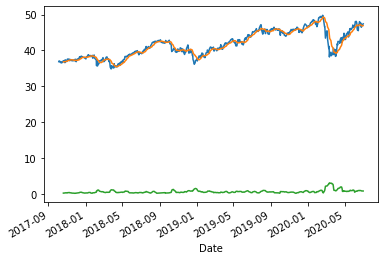

In [107]:
data.Close.plot()
data.Close.rolling(12).mean().plot(label= '12 month rolling mean')
data.Close.rolling(12).std().plot(label='12 month rolling std')

In [108]:
#import statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose

import plotly.graph_objects as go

In [109]:
decomposition = seasonal_decompose(data.Close, model='multiplicative', period=100)

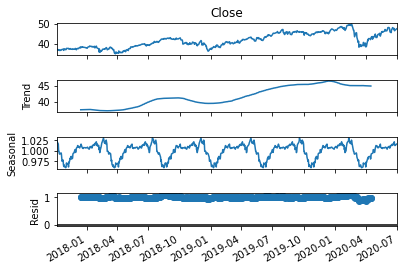

In [110]:
decomposition.plot().autofmt_xdate()

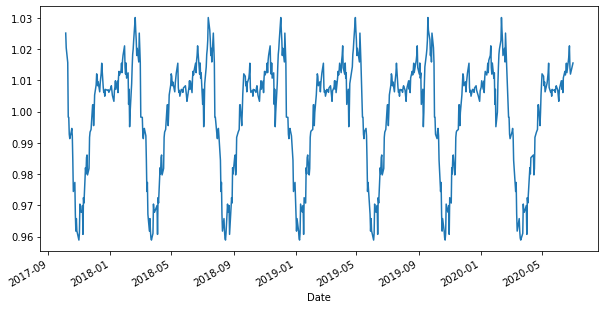

In [111]:
plt.figure(figsize=(10, 5))
decomposition.seasonal.plot()
#plt.plot(decomposition.seasonal)

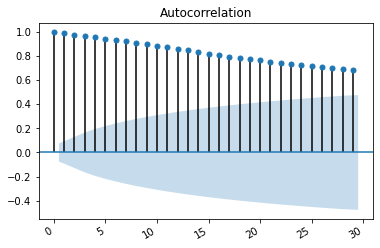

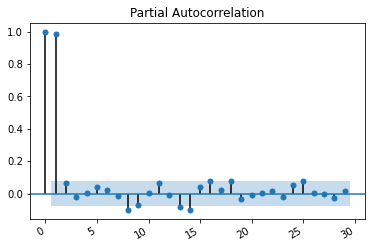

In [112]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data.Close).autofmt_xdate()
plot_pacf(data.Close).autofmt_xdate()